In [10]:
import camb 
from camb import model, initialpower
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=73, ombh2=0.0255792, omch2=0.1023168, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.956, r=0)

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.956
 nrun = 0.0
 nrunrun = 0.0
 nt = 0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

In [12]:
0.24*0.73**2

0.12789599999999998

In [13]:
pars.set_for_lmax(2000, lens_potential_accuracy=1)
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

In [14]:
## Import Hubble parameter calculated with my PC code 
myhub = pd.read_csv('fid_hubble_mycode.csv')
cambhub = [results.hubble_parameter(z) for z in myhub['z']]


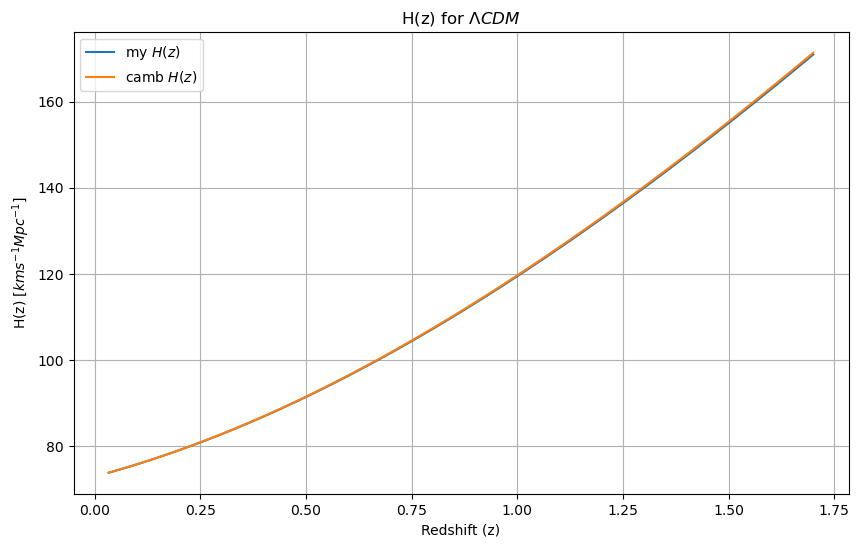

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(myhub['z'], myhub['H'] , label=r'my $H(z)$')
plt.plot(myhub['z'], cambhub, label=r'camb $H(z)$')
plt.xlabel('Redshift (z)')
plt.ylabel(r'H(z) $[km s^{-1} Mpc^{-1}]$')
plt.title(r'H(z) for $\Lambda CDM$')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
## Import the luminosity distance calculated with my PC code

mydL = pd.read_csv('fid_dL_mycode.csv')
cambdL = [results.luminosity_distance(z) for z in mydL['z']]

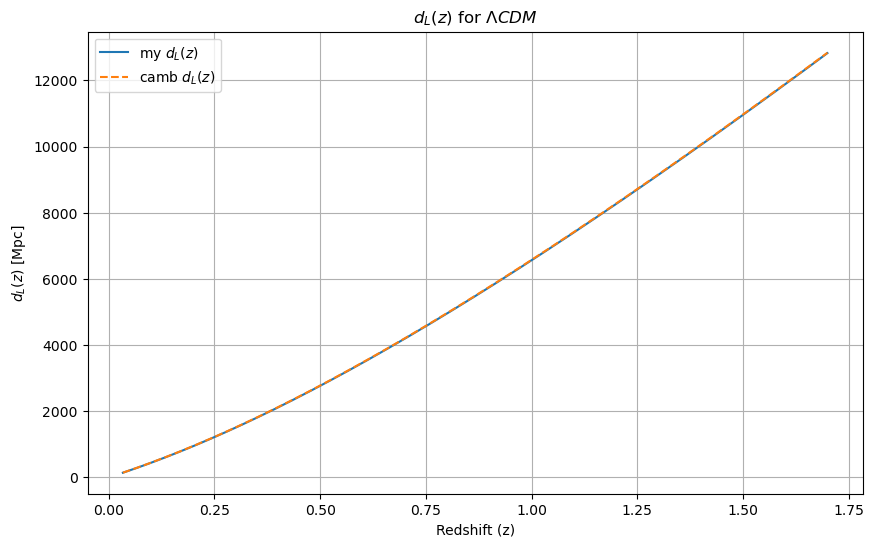

In [17]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mydL['z'], mydL['dL'] , label=r'my $d_L(z)$')
plt.plot(mydL['z'], cambdL, linestyle='dashed', label=r'camb $d_L(z)$')
plt.xlabel('Redshift (z)')
plt.ylabel(r'$d_L(z)$ [Mpc]')
plt.title(r'$d_L(z)$ for $\Lambda CDM$')
plt.legend()
plt.grid(True)
plt.show()